In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
tf.random.set_seed(3)
from skimage import io 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU

In [2]:
folders_names = []
for i in range(6):
    folder = r'C:\Users\dlsat\Downloads\leapGestRecog\0{}'.format(i)
    folders_names.append(folder)

files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

In [3]:
folders_names

['C:\\Users\\dlsat\\Downloads\\leapGestRecog\\00',
 'C:\\Users\\dlsat\\Downloads\\leapGestRecog\\01',
 'C:\\Users\\dlsat\\Downloads\\leapGestRecog\\02',
 'C:\\Users\\dlsat\\Downloads\\leapGestRecog\\03',
 'C:\\Users\\dlsat\\Downloads\\leapGestRecog\\04',
 'C:\\Users\\dlsat\\Downloads\\leapGestRecog\\05']

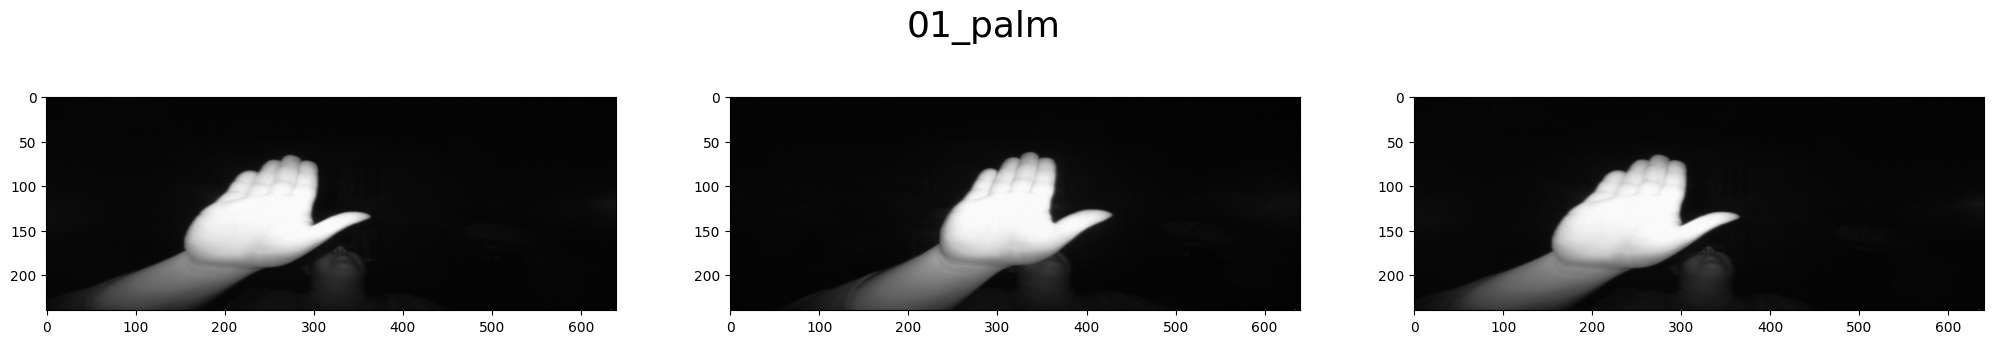

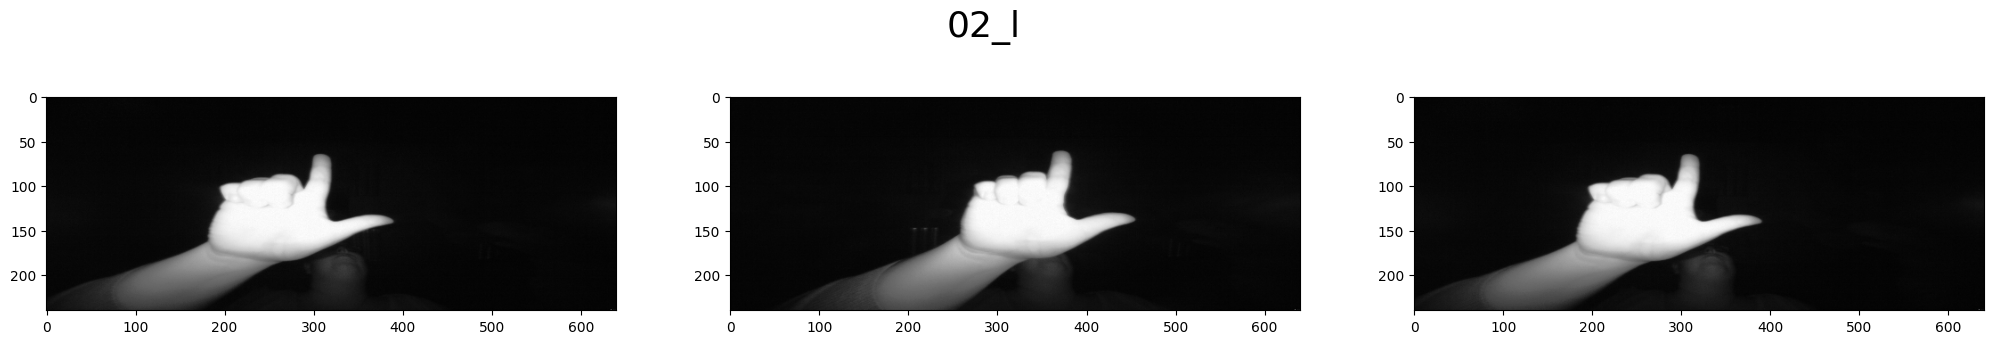

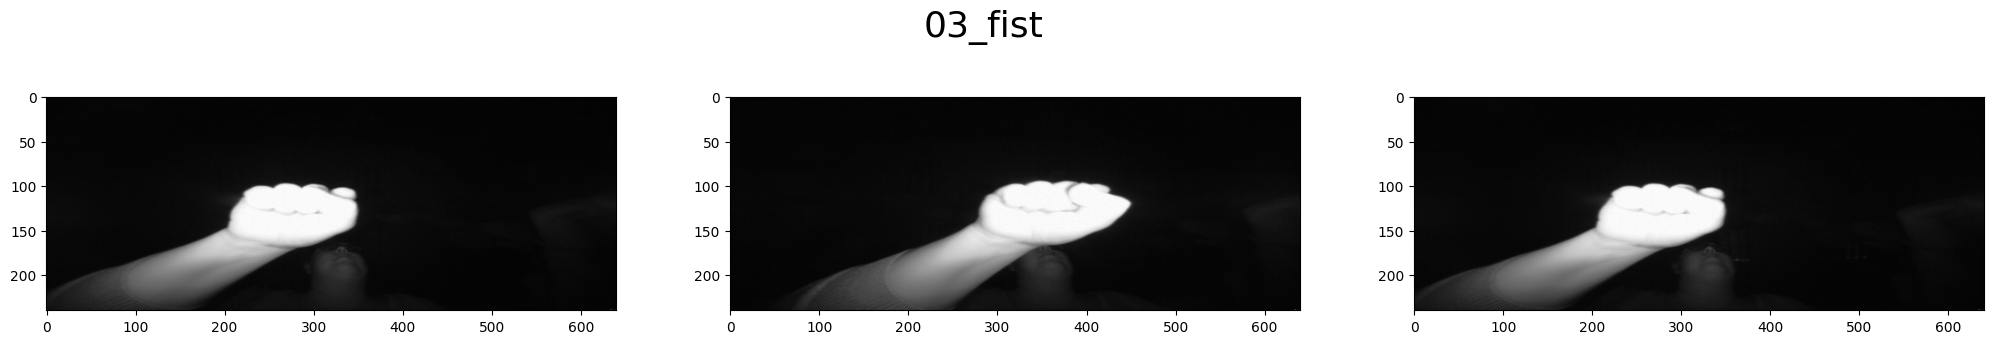

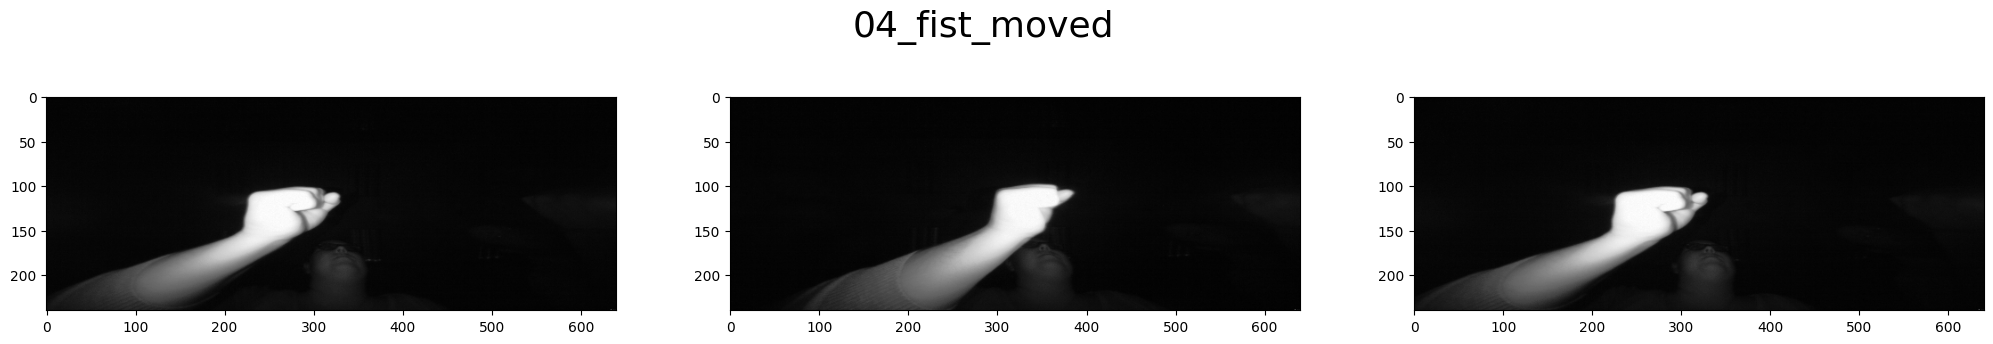

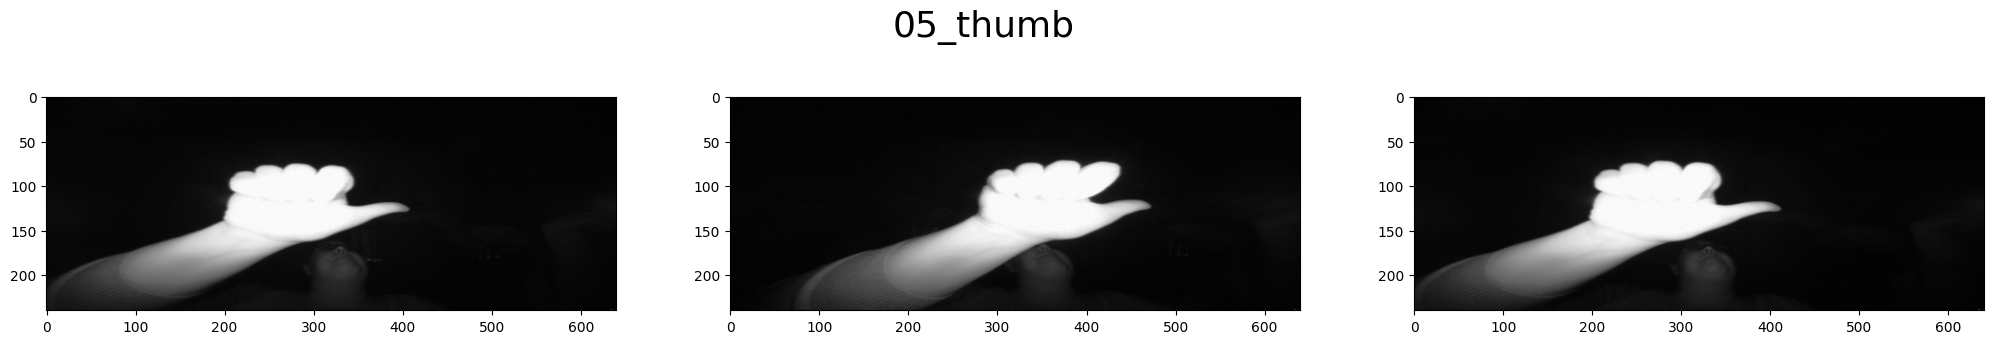

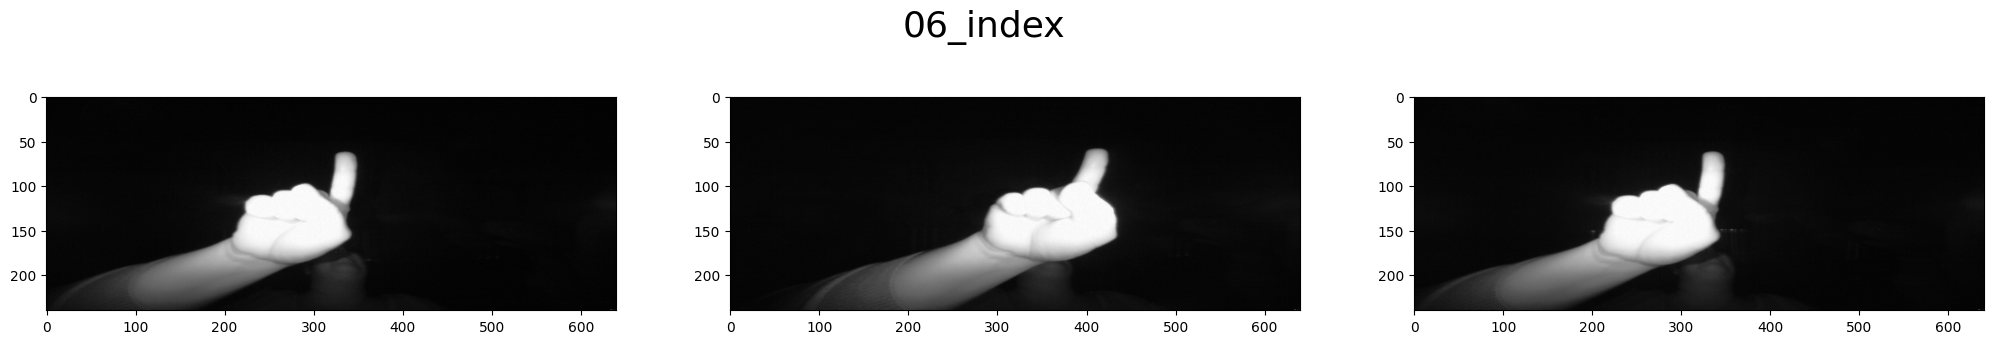

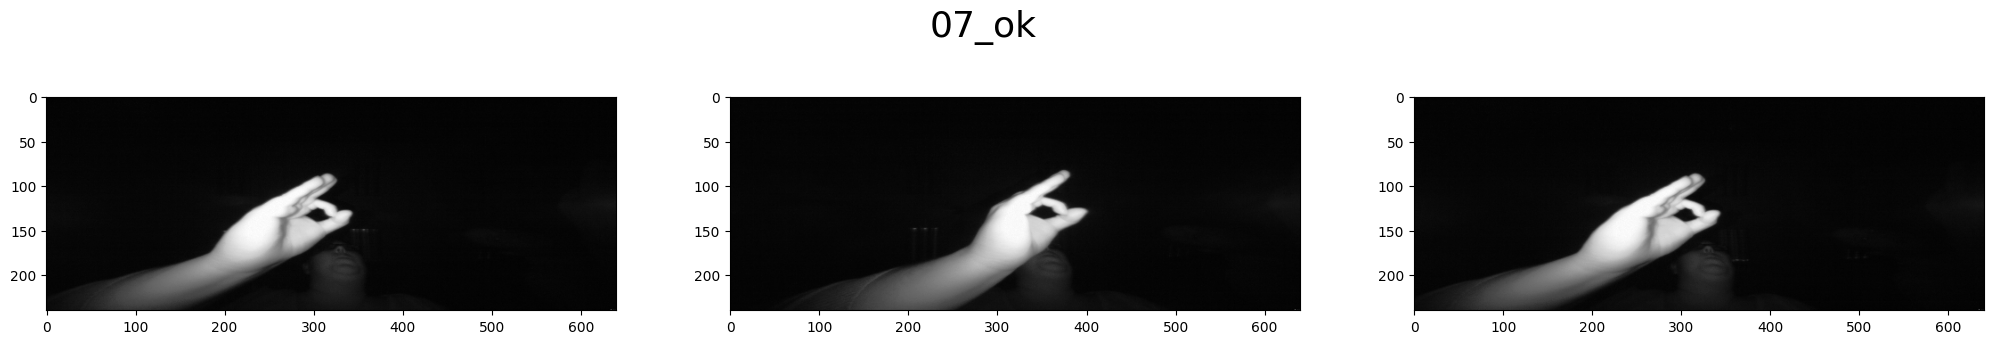

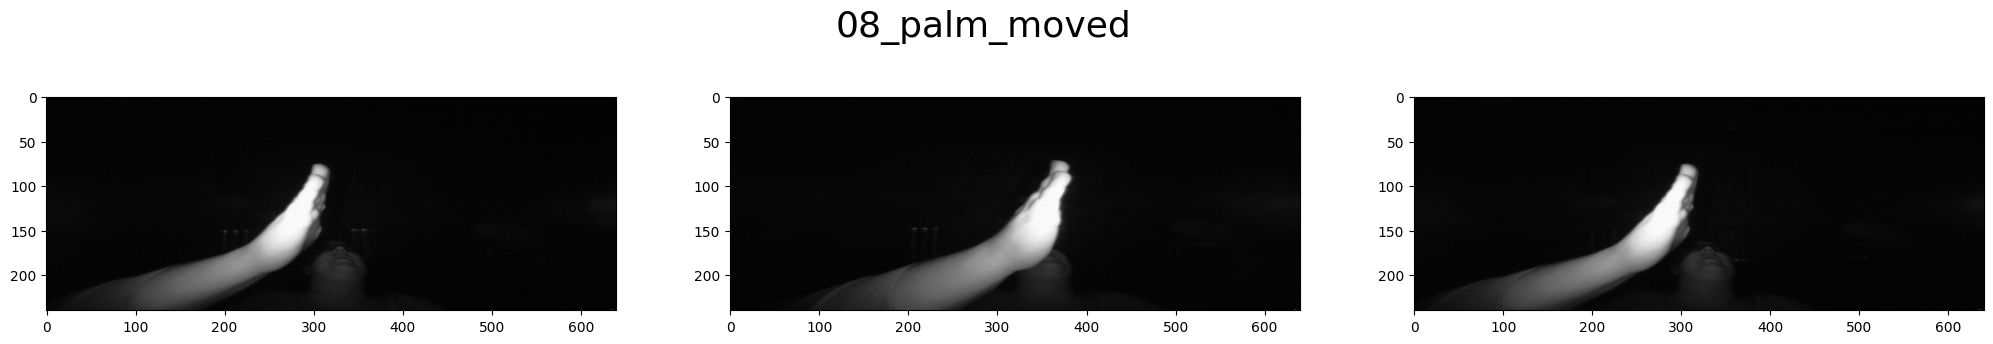

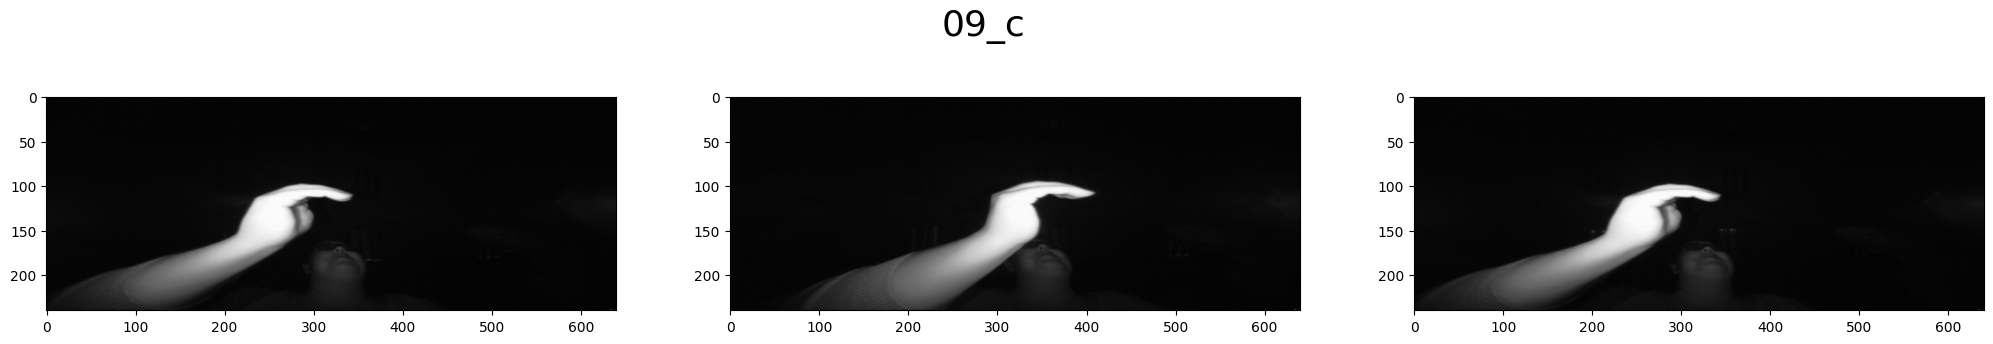

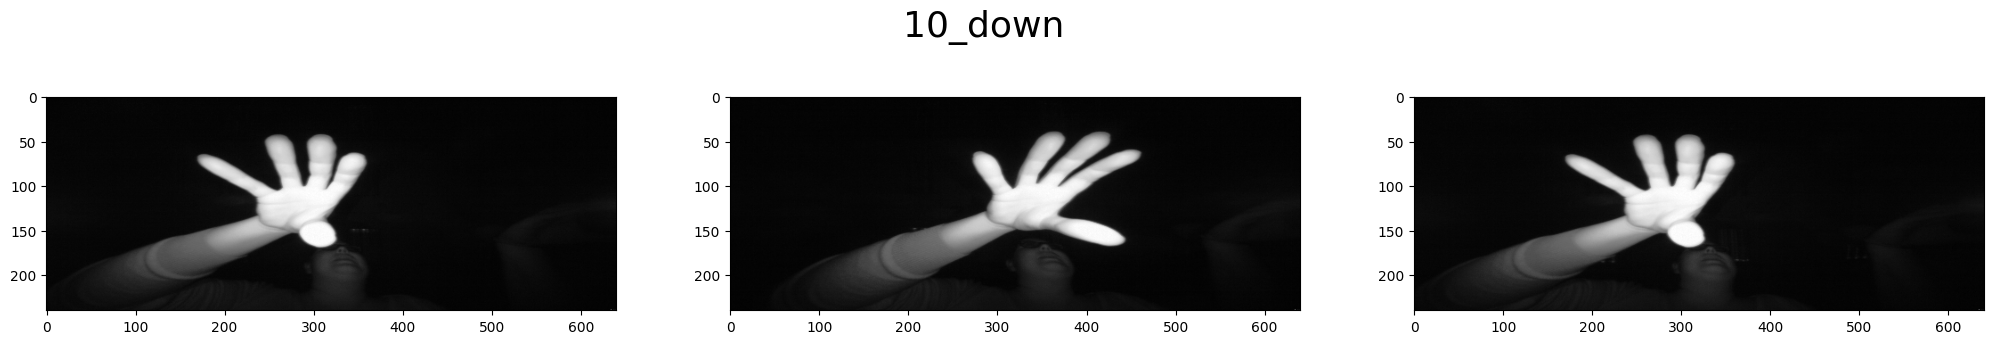

In [4]:

Class_num = folders_names[0][-1]  # Assuming the class number is the last character in the folder name

for file in files_names:
    path = os.path.join(folder, file)  # Construct the full path to the subcategory folder
    x = 0  # Counter to track the number of images displayed
    fig, axes = plt.subplots(1, 3, figsize=(25, 4))  # Create a figure with 3 subplots in a row

    for img in os.listdir(path):  # Iterate through the images in the subcategory folder
        img_array = io.imread(os.path.join(path, img), as_gray=True)  # Read the image in grayscale
        axes[x].imshow(img_array, cmap='gray')  # Display the image on the corresponding subplot
        x += 1  # Increment the counter
        if x == 3:  # Stop after displaying 3 images
            break

    plt.suptitle(f"{file}", fontsize=26)  # Add a title to the figure
    plt.show()  # Display the figure

In [5]:
training_data = []

def create_training_data():
    for folder in folders_names:
        Class_num = folder[-1]  # Assuming the class number is the last character in the folder name
        
        
        for file in files_names:
            path = os.path.join(folder, file)

            
            for img in tqdm(os.listdir(path)):  # Iterate through the images in the subcategory folder
                img_array = io.imread(os.path.join(path, img), as_gray=True)  # Read the image in grayscale
                
                # Ensure the image is in the correct format (e.g., uint8)
                if img_array.dtype != np.uint8:
                    img_array = (img_array * 255).astype(np.uint8)
                
                training_data.append([img_array, int(Class_num)])
                        


In [6]:
create_training_data() 

100%|██████████| 200/200 [00:05<00:00, 33.45it/s]


In [7]:
training_data

[[array([[ 6,  5,  4, ...,  3,  6,  3],
         [ 5,  4,  4, ...,  5,  2,  4],
         [ 4,  6,  5, ...,  3,  2,  4],
         ...,
         [ 4,  5,  6, ...,  4,  4,  7],
         [ 4,  5,  4, ...,  3,  3,  4],
         [ 4,  5,  4, ..., 25, 12, 20]], dtype=uint8),
  0],
 [array([[ 4,  5,  4, ...,  2,  3,  3],
         [ 4,  3,  3, ...,  4,  2,  3],
         [ 5,  3,  4, ...,  4,  4,  3],
         ...,
         [ 6,  5,  4, ...,  3,  6,  4],
         [ 5,  3,  6, ...,  5,  3,  3],
         [ 5,  5,  5, ..., 25, 12, 16]], dtype=uint8),
  0],
 [array([[ 4,  5,  4, ...,  2,  3,  3],
         [ 4,  3,  3, ...,  4,  2,  3],
         [ 5,  3,  4, ...,  4,  4,  3],
         ...,
         [ 6,  5,  4, ...,  3,  6,  4],
         [ 5,  3,  6, ...,  5,  3,  3],
         [ 5,  5,  5, ..., 25, 12, 16]], dtype=uint8),
  0],
 [array([[ 2,  4,  3, ...,  3,  2,  4],
         [ 5,  4,  5, ...,  4,  3,  4],
         [ 6,  4,  4, ...,  4,  3,  3],
         ...,
         [ 5,  5,  4, ...,  5,  4,  5],
 

In [9]:
def check_image_sizes():
    first_img_shape = None
    for folder in folders_names:
        for file in files_names:
            path = os.path.join(folder, file)
            for img in os.listdir(path):
                img_array = io.imread(os.path.join(path, img), as_gray=True)  # Read the image in grayscale
                if first_img_shape is None:
                    first_img_shape = img_array.shape
                elif img_array.shape != first_img_shape:
                    print("Image sizes are not consistent.")
                    return False
    print("All images have the same size:", first_img_shape)
    return True



In [10]:
check_image_sizes()

All images have the same size: (240, 640)


True

In [11]:
for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])

Class number for image 12000 : 5
Class number for image 11999 : 5
Class number for image 11998 : 5
Class number for image 11997 : 5
Class number for image 11996 : 5


In [12]:
random.shuffle(training_data)

for i in range(15):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n") 

Sample 1:
Class number: 3 

Sample 2:
Class number: 5 

Sample 3:
Class number: 5 

Sample 4:
Class number: 0 

Sample 5:
Class number: 2 

Sample 6:
Class number: 5 

Sample 7:
Class number: 3 

Sample 8:
Class number: 0 

Sample 9:
Class number: 1 

Sample 10:
Class number: 3 

Sample 11:
Class number: 1 

Sample 12:
Class number: 2 

Sample 13:
Class number: 3 

Sample 14:
Class number: 2 

Sample 15:
Class number: 2 



In [13]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)

In [14]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(12000, 240, 640)
(12000,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
np.unique(y_train)



array([0, 1, 2, 3, 4, 5])

In [17]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5])

In [18]:
print(X_train[0])

[[ 6  7  5 ...  6  4  4]
 [ 5  6  6 ...  5  7  5]
 [ 6  7  6 ...  7  5  5]
 ...
 [ 6  5  6 ...  7  6  6]
 [ 4  5  6 ...  7  6  6]
 [ 5  6  6 ... 25 12 16]]


In [19]:
model = Sequential([
    Flatten(input_shape=(240, 640)),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dense(10, activation='softmax')
])

c:\Users\dlsat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\dlsat\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=3, validation_split=0.1, batch_size=32, verbose=2)

Epoch 1/3
270/270 - 51s - 189ms/step - accuracy: 0.8352 - loss: 34.8342 - val_accuracy: 0.9385 - val_loss: 4.1730
Epoch 2/3
270/270 - 25s - 94ms/step - accuracy: 0.9569 - loss: 2.5734 - val_accuracy: 0.8406 - val_loss: 10.6705
Epoch 3/3
270/270 - 24s - 90ms/step - accuracy: 0.9484 - loss: 4.8121 - val_accuracy: 0.9708 - val_loss: 0.7929


In [22]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss}")
print(f"Training Accuracy: {accuracy*100}%")

300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9697 - loss: 1.3365
Training Loss: 1.2544081211090088
Training Accuracy: 97.04166650772095%


In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testing Loss: {loss}")
print(f"Testing Acuuracy : {accuracy*100} %")

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9718 - loss: 1.2451
Testing Loss: 0.9981094598770142
Testing Loss : 97.50000238418579 %


In [24]:
y_pred=model.predict(X_test)
print(y_pred[0])

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
[0.         0.         0.99712116 0.         0.         0.00287887
 0.         0.         0.         0.        ]


In [25]:
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred[1])

2


In [26]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[359,   0,   0,   0,   9,   0],
       [  0, 412,   0,   0,   0,   0],
       [  0,   0, 392,   0,   8,   6],
       [  0,   0,   9, 401,   0,   0],
       [  0,   0,   0,   0, 391,   0],
       [  1,   0,  27,   0,   0, 385]])>

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       368
           1       1.00      1.00      1.00       412
           2       0.92      0.97      0.94       406
           3       1.00      0.98      0.99       410
           4       0.96      1.00      0.98       391
           5       0.98      0.93      0.96       413

    accuracy                           0.97      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.97      0.98      2400

